In [8]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from pydub import AudioSegment
from pydub.silence import split_on_silence
from pydub.utils import make_chunks


In [3]:
voice = AudioSegment.from_file('voice/p1.ogg')
voice

FileNotFoundError: [Errno 2] No such file or directory: 'voice/p1.ogg'

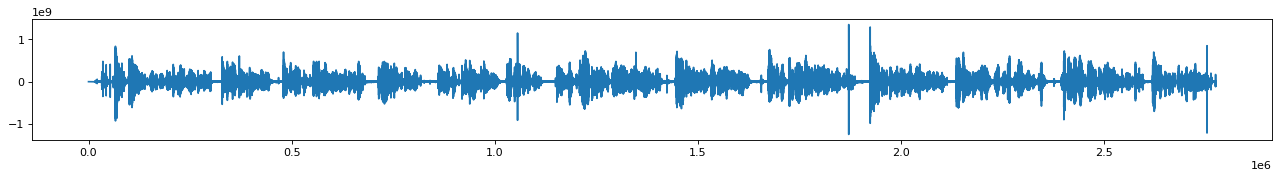

In [ ]:
array = voice.get_array_of_samples()
plt.figure(figsize = (20, 2), dpi = 80)
plt.plot(array)
plt.show()

In [ ]:
voice1 = AudioSegment.from_file('voice/p1.ogg')
voice2 = AudioSegment.from_file('voice/p2.ogg')
result = voice1 + voice2 
result
result.export('voice/parisa.wav', format = 'wav')

<_io.BufferedRandom name='voice/parisa.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/a1.ogg')
voice2 = AudioSegment.from_file('voice/a2.ogg')
result = voice1 + voice2 
result
result.export('voice/alireza.wav', format = 'wav')

<_io.BufferedRandom name='voice/alireza.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/h1.ogg')
voice2 = AudioSegment.from_file('voice/h2.ogg')
result = voice1 + voice2 
result
result.export('voice/mohammad.wav', format = 'wav')

<_io.BufferedRandom name='voice/mohammad.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/n1.ogg')
voice2 = AudioSegment.from_file('voice/n2.ogg')
result = voice1 + voice2 
result
result.export('voice/nahid.wav', format = 'wav')

<_io.BufferedRandom name='voice/nahid.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/z1.ogg')
voice2 = AudioSegment.from_file('voice/z2.ogg')
result = voice1 + voice2 
result
result.export('voice/zeynab.wav', format = 'wav')

<_io.BufferedRandom name='voice/zeynab.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/mo1.m4a')
voice2 = AudioSegment.from_file('voice/mo2.m4a')
result = voice1 + voice2 
result
result.export('voice/morteza.wav', format = 'wav')

<_io.BufferedRandom name='voice/morteza.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/za1.opus')
voice2 = AudioSegment.from_file('voice/za2.opus')
result = voice1 + voice2 
result
result.export('voice/zahra.wav', format = 'wav')

<_io.BufferedRandom name='voice/zahra.wav'>

In [ ]:
voice1 = AudioSegment.from_file('voice/m1.ogg')
voice2 = AudioSegment.from_file('voice/m2.ogg')
result = voice1 + voice2 
result
result.export('voice/maryam.wav', format = 'wav')

<_io.BufferedRandom name='voice/maryam.wav'>

In [5]:
voice_path = 'voice'
remove_silence_path = 'silence_remove'


for file in os.listdir(voice_path):
    file_path = os.path.join(voice_path, file)
    voice = AudioSegment.from_file(file_path)
    voice_parts = split_on_silence(voice, min_silence_len = 2000, silence_thresh = -45)
    combined_voice = sum(voice_parts)
    name = Path(file).stem
    output_path = os.path.join(remove_silence_path, name + '.wav')
    combined_voice.export(output_path, format = 'wav')


In [15]:
remove_silence_path = 'silence_remove'
dataset_path = 'dataset'

for file in os.listdir(remove_silence_path):
    file_path = os.path.join(remove_silence_path, file)
    voice = AudioSegment.from_file(file_path)
    chunks = make_chunks(voice, 1000)

    name = Path(file).stem
    Path(os.path.join(dataset_path, name)).mkdir(exist_ok= True)

    for i, chunk in enumerate(chunks):
        if len(chunk) < 1000:
            continue
        output_path = os.path.join(dataset_path, name, name + f'_{i}.wav')
        chunk.export(output_path, format = 'wav')
